In [1]:
import numpy as np
import pandas as pd

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install nltk
import nltk
nltk.download('punkt')


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [7]:
%pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df = pd.read_csv('spam.csv')

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5057,ham,"Geeeee ... Your internet is really bad today, ...",NaN,NaN,NaN
989,ham,Ugh. Gotta drive back to sd from la. My butt i...,NaN,NaN,NaN
1011,ham,"I just got home babe, are you still awake ?",NaN,NaN,NaN
884,ham,Yoyyooo u know how to change permissions for a...,NaN,NaN,NaN
900,ham,Probably money worries. Things are coming due ...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
2381,ham,Best line said in Love: . \I will wait till th...
3058,ham,"Dear all, as we know &lt;#&gt; th is the &lt..."
542,ham,But am going to college pa. What to do. are el...
1170,ham,"Yeah, we can probably swing by once my roommat..."
4958,ham,"What i mean was i left too early to check, cos..."


In [15]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2740,ham,Nothing. Can...
2748,ham,Send his number and give reply tomorrow mornin...
1919,ham,Yar i wanted 2 scold u yest but late already.....
2610,ham,"As usual..iam fine, happy &amp; doing well..:)"
1465,spam,YOU 07801543489 are guaranteed the latests Nok...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

403

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

In [24]:
df['text'] = df['text'].str.lower()
df.head()

,target,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [25]:
import re 

def remove_special_characters(text):
  text = re.sub(r'[^\w\s]', '', text)  
  return text


df['text'] = df['text'].apply(remove_special_characters)

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
import tqdm
from nltk import word_tokenize
nltk.download('wordnet')

def lemmatize_text(text):
  """Lemmatizes words in a string."""
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenize(text)
  lemmatized_sentence = [lemmatizer.lemmatize(w) for w in word_tokens]
  return " ".join(lemmatized_sentence)

df["text"] = [lemmatize_text(text) for text in tqdm.tqdm(df['text'], desc="Cleaning reviews")]
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Cleaning reviews: 100%|██████████| 5169/5169 [00:04<00:00, 1173.83it/s]


,target,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he go to usf he life around h...


## 2.EDA

In [27]:
df.head()

,target,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he go to usf he life around h...


In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

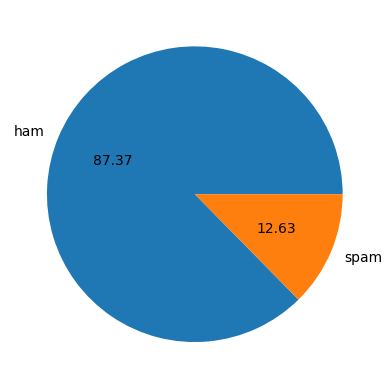

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
# Data is imbalanced

In [31]:
import nltk

In [32]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_characters'] = df['text'].apply(len)

In [35]:
df.head()

,target,text,num_characters
0,0,go until jurong point crazy available only in ...,102
1,0,ok lar joking wif u oni,23
2,1,free entry in 2 a wkly comp to win fa cup fina...,149
3,0,u dun say so early hor u c already then say,43
4,0,nah i dont think he go to usf he life around h...,56


In [36]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words
0,0,go until jurong point crazy available only in ...,102,20
1,0,ok lar joking wif u oni,23,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28
3,0,u dun say so early hor u c already then say,43,11
4,0,nah i dont think he go to usf he life around h...,56,13


In [38]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,go until jurong point crazy available only in ...,102,20,1
1,0,ok lar joking wif u oni,23,6,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1
3,0,u dun say so early hor u c already then say,43,11,1
4,0,nah i dont think he go to usf he life around h...,56,13,1


In [40]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,73.670729,15.140453,0.999613
std,54.590056,10.857382,0.019668
min,0.000000,0.000000,0.000000
25%,33.000000,7.000000,1.000000
50%,56.000000,12.000000,1.000000
75%,109.000000,22.000000,1.000000
max,884.000000,171.000000,1.000000


In [41]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.00000,4516.000000
mean,65.557130,13.94752,0.999557
std,52.656631,10.89351,0.021042
min,0.000000,0.00000,0.000000
25%,31.000000,7.00000,1.000000
50%,49.000000,11.00000,1.000000
75%,85.000000,18.00000,1.000000
max,884.000000,171.00000,1.000000


In [42]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.0
mean,129.782542,23.390505,1.0
std,28.481646,5.881945,0.0
min,12.000000,2.000000,1.0
25%,123.000000,21.000000,1.0
50%,140.000000,25.000000,1.0
75%,148.000000,27.000000,1.0
max,206.000000,34.000000,1.0


In [43]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

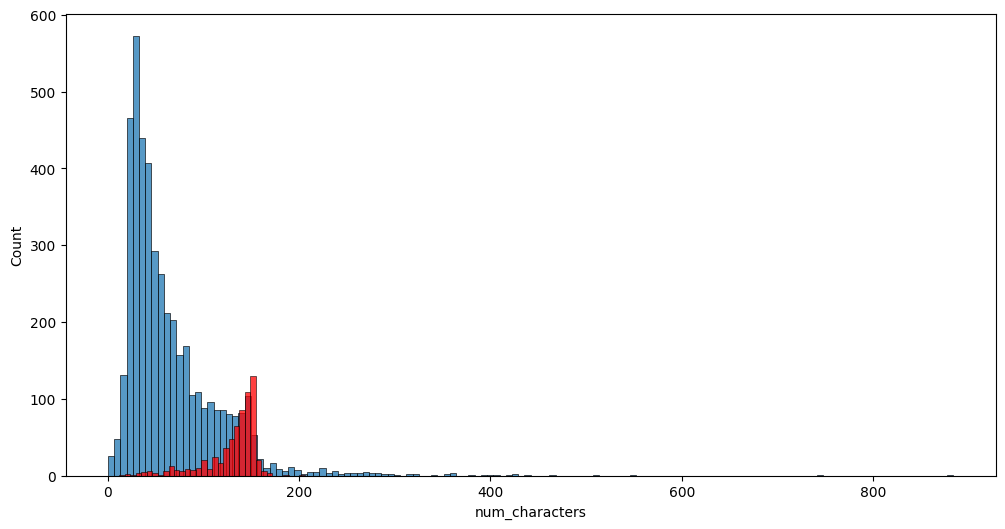

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

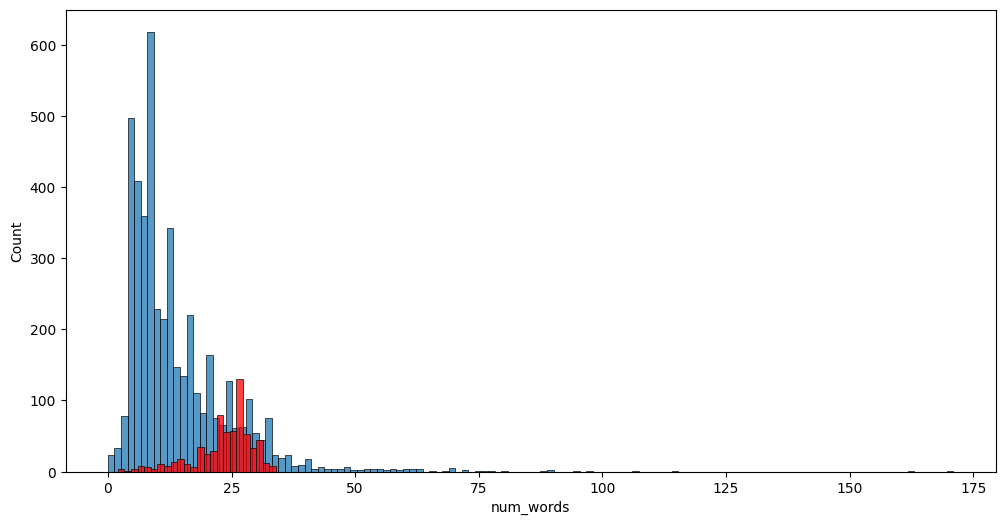

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

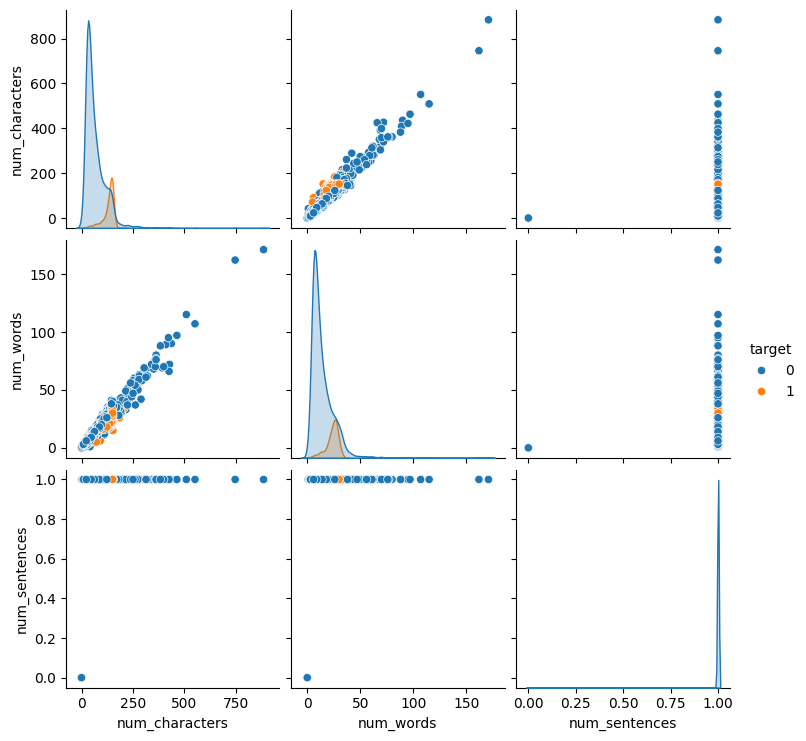

In [46]:
sns.pairplot(df,hue='target')

<Axes: >

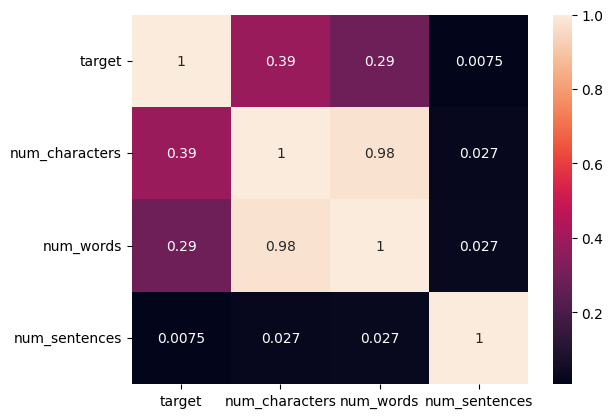

In [47]:
df_numeric = df.select_dtypes(include=['float', 'int'])
sns.heatmap(df_numeric.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [48]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [49]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
df['text'][10]

'im gon na be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today'

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he go to usf he life around h...,56,13,1,nah dont think go usf life around though


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

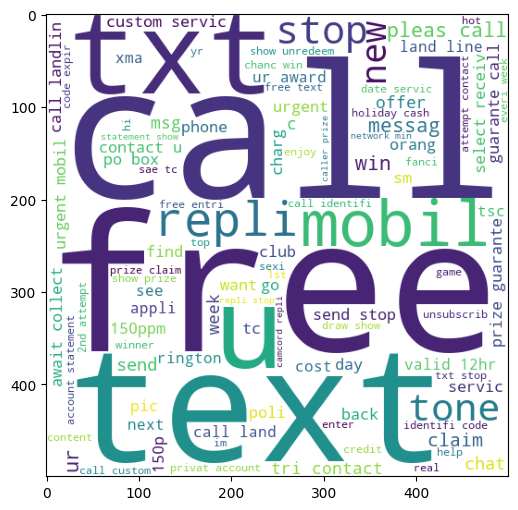

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

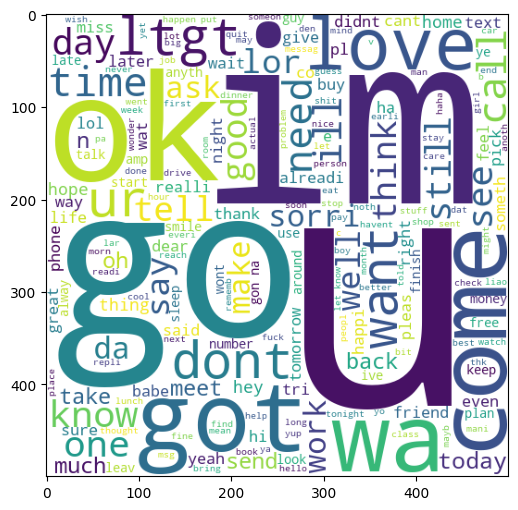

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he go to usf he life around h...,56,13,1,nah dont think go usf life around though


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [61]:
len(spam_corpus)

10835

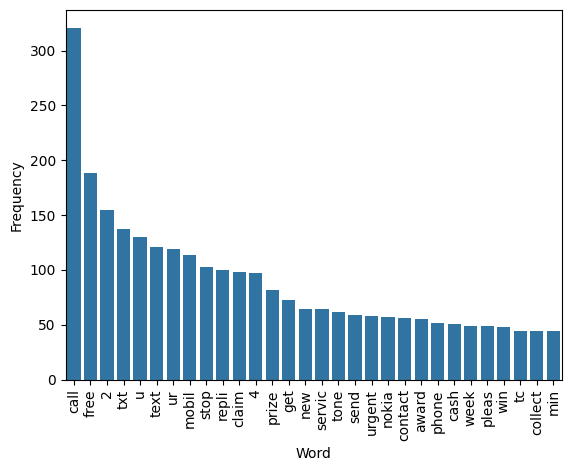

In [62]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume spam_corpus is a list of words
# Create a DataFrame from the most common words
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Frequency"])

# Plot the bar chart
sns.barplot(x="Word", y="Frequency", data=common_words)
plt.xticks(rotation="vertical")  # Rotate x-axis labels for better readability
plt.show()


In [63]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

37019

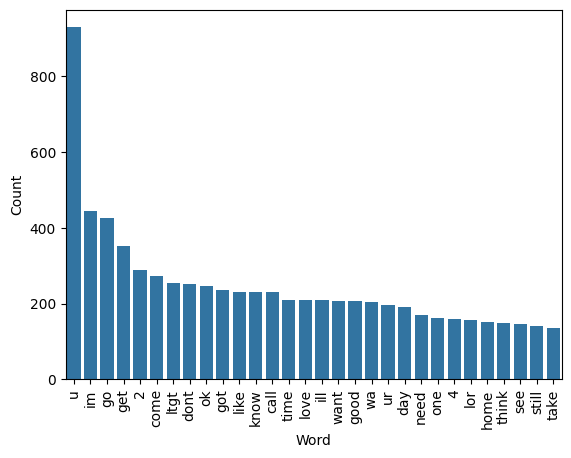

In [65]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ham_corpus` is already defined
# Create a DataFrame from the Counter results
ham_corpus_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Count"])

# Plot the barplot using explicit x and y
sns.barplot(x="Word", y="Count", data=ham_corpus_counts)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he go to usf he life around h...,56,13,1,nah dont think go usf life around though


## 4. Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [71]:
X.shape

(5169, 3000)

In [72]:
y = df['target'].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8665377176015474
[[780 116]
 [ 22 116]]
0.5


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [80]:
# tfidf --> MNB

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9669421487603306)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.8666666666666667
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9333333333333333
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9821428571428571


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9469026548672567
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8818897637795275
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.94
For  xgb
Accuracy -  0.9632495164410058
Precision -  0.923728813559322


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.974855,1.000000
5,RF,0.970986,0.982143
8,ETC,0.977756,0.975207
0,SVC,0.975822,0.966942
6,AdaBoost,0.964217,0.946903
9,GBDT,0.951644,0.940000
4,LR,0.954545,0.933333
10,xgb,0.963250,0.923729
7,BgC,0.960348,0.881890


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [90]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.970986
3,ETC,Accuracy,0.977756
4,SVC,Accuracy,0.975822
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.951644
7,LR,Accuracy,0.954545
8,xgb,Accuracy,0.963250
9,BgC,Accuracy,0.960348


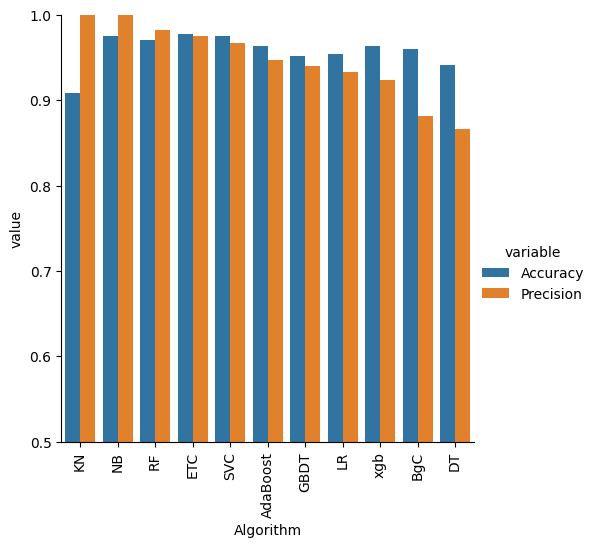

In [91]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [95]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [96]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [98]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.970986,0.982143,0.970986,0.982143,0.970986,0.982143,0.970986,0.982143
3,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,SVC,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
5,AdaBoost,0.964217,0.946903,0.964217,0.946903,0.964217,0.946903,0.964217,0.946903
6,GBDT,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
7,LR,0.954545,0.933333,0.954545,0.933333,0.954545,0.933333,0.954545,0.933333
8,xgb,0.963250,0.923729,0.963250,0.923729,0.963250,0.923729,0.963250,0.923729
9,BgC,0.960348,0.881890,0.960348,0.881890,0.960348,0.881890,0.960348,0.881890


In [99]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [103]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [106]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.953125


In [107]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [108]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download NLTK data if not already available
nltk.download('stopwords')
nltk.download('punkt')

# Initialize PorterStemmer
ps = PorterStemmer()

# Text preprocessing function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(text)

# Load the pre-trained vectorizer and model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))
print("Model and vectorizer loaded successfully.")

Model and vectorizer loaded successfully.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [109]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pickle

# Dummy dataset for training
data = {
    "text": ["hello how are you", "win money now", "call me later", "spam offer buy now", "important meeting"],
    "label": [0, 1, 0, 1, 0],  # 0 = Not Spam, 1 = Spam
}
df = pd.DataFrame(data)

# Preprocessing function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(text)

# Apply preprocessing
df['transformed_text'] = df['text'].apply(transform_text)

# Vectorize the text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text'])
y = df['label']

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X, y)

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
